# Getting Started in Machine Learning
### Chapter 14: KNN
This notebook contains examples from the book:

Getting Started in Machine Learning: Easy Recipes for Python 3, Scikit-Learn, Jupyter (2019) by Bella Romeo, Sherwood Forest Books, Los Angeles, CA, USA, ISBN-13: 978-0-9966860-6-8

(c) Copyright 2019.

<font style="font-size:xx-small; font-family:courier;">

    This notebook is free software: you can redistribute it and/or modify
    it under the terms of the GNU General Public License as published by
    the Free Software Foundation, either version 3 of the License, or
    (at your option) any later version.

    This program is distributed in the hope that it will be useful,
    but WITHOUT ANY WARRANTY; without even the implied warranty of
    MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.  See the
    GNU General Public License for more details.

    You should have received a copy of the GNU General Public License
    along with this program. If not, see <https://www.gnu.org/licenses/>.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
data=pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data",
           header=None,na_values="?")
data.columns=("mpg","cyl","displ","hp","weight","accel","model","origin","carname")
data = data.dropna(axis=0)
data[:3]

,mpg,cyl,displ,hp,weight,accel,model,origin,carname
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""


In [3]:
cardata=np.array(data[["cyl","mpg","accel"]])
cardata[:3]

array([[ 8. , 18. , 12. ],
       [ 8. , 15. , 11.5],
       [ 8. , 18. , 11. ]])

In [4]:
cars=np.array([line for line in cardata if line[0] in [4,6,8]])

In [5]:
len(cars),len(cardata)

(385, 392)

Define classes: 0, 1, 2 = 4, 6, 8 cylinder
Define features: X[0]=weight; X[1]=accel

In [6]:
Y=cars[:,0]/2-2

In [7]:
X=cars[:,1:]

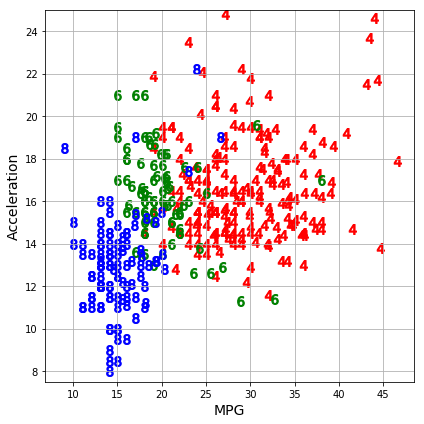

In [8]:
colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
for i in range(len(colors)):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)

## Demonstrate Single Split and fit with KNN

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [10]:
nruns = 100
errs = []
for j in range(nruns):
    KNN=KNeighborsClassifier(n_neighbors=4)
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    KNN.fit(XTRAIN, YTRAIN)
    YP=KNN.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nruns, np.mean(errs),1.96*np.std(errs)))
print("Final confusion_matrix:")
print(confusion_matrix(YTEST,YP))


100 Splits: Mean Error=0.126495 +/- 0.055252 (95%)
Final confusion_matrix:
[[50  3  0]
 [ 4 14  1]
 [ 0  4 21]]


## Visualize

In [11]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .25),
                     np.arange(y_min, y_max, .25))

In [12]:
Z = KNN.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

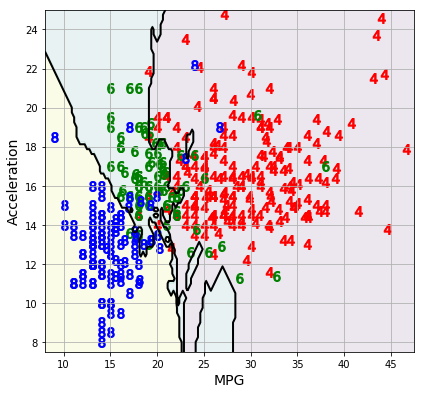

In [13]:
c=plt.contour(xx, yy, Z, alpha=1,levels=[.5, 1.5],linewidths=2,colors="k")
c=plt.contourf(xx, yy, Z, alpha=.1)#,levels=[.5, 1.5])


colors=["red", "green","blue"]
markers=["$4$","$6$","$8$"]
for i in range(len(colors)):
    x,y=zip(*X[Y==i])
    plt.scatter(x,y,marker=markers[i],color=colors[i],s=100)


plt.xlabel("MPG",fontsize=14)
plt.ylabel("Acceleration",fontsize=14)
plt.ylim([7.5,25])
plt.grid()
fig=plt.gcf()
fig.tight_layout()
fig.set_size_inches(6,6)
#fig.savefig("knn-decision-boundary-mpg-accel-cylinders.png")

## Repeat with multple splits and vary neighbors

In [14]:
errs=[]
splits=100
for neighbors in range(1,16):
    KNN = KNeighborsClassifier(n_neighbors=neighbors)
    errors=[]
    for split in range(splits):
        XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y,test_size=.25)
        KNN.fit(XTRAIN, YTRAIN)
        YP=KNN.predict(XTEST)
        err=1-accuracy_score(YTEST,YP)
        errors.append(err)
    errs.append(errors)
means=np.mean(errs,axis=1)
sigmas=np.std(errs,axis=1,ddof=1)

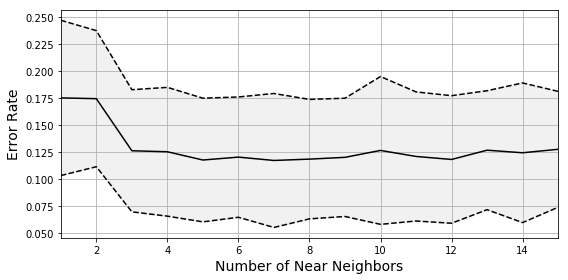

In [15]:
xvals=range(1,16)
plt.plot(xvals,means,c="k")
plt.plot(xvals,means+1.96*sigmas,c="k",ls="--")
plt.plot(xvals,means-1.96*sigmas,c="k",ls="--")
plt.fill_between(xvals, means+1.96*sigmas,means-1.96*sigmas,color="lightgray",alpha=.3)
plt.grid()
plt.xlabel("Number of Near Neighbors",fontsize=14)
plt.ylabel("Error Rate",fontsize=14)
plt.xlim([1,15]);
fig=plt.gcf()
fig.set_size_inches(8,4)
fig.tight_layout()
fig.savefig("KNN-error-rate-vs-number-of-neighbors.pdf")

In [16]:
def visualize_classifier_contours(ax,clf,X,Y,xinterval,yinterval,DX,DY,thelevels,colors):
    #xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
    #yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(*xinterval, DX),
                         np.arange(*yinterval, DY))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    c=ax.contour(xx, yy, Z, alpha=1,levels=thelevels,linewidths=1,
                 colors="k")
    c=ax.contourf(xx, yy, Z, alpha=.1)
     
    nclass=len(colors)
    for j in range(nclass):
        col=colors[j]
        xyvals=X[Y==j]
        if len(xyvals)>0:
            x,y=zip(*xyvals)
            ax.scatter(x,y,marker=".",color=col, s=10)    
    return(ax)

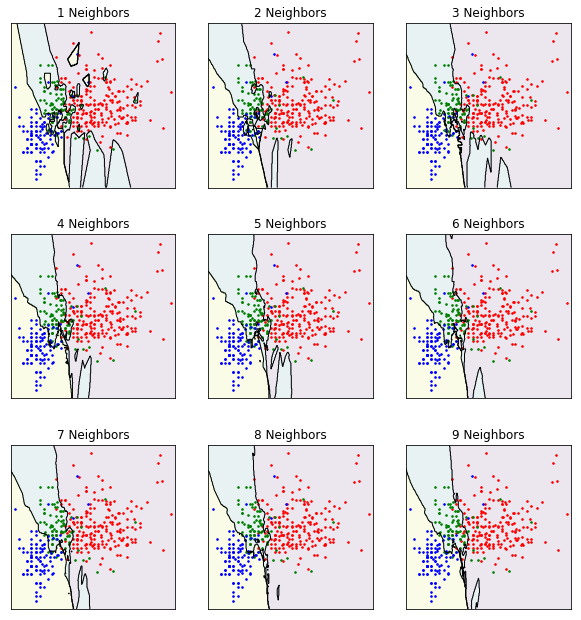

In [17]:
markers=["$4$","$6$","$8$"]
colors=["red", "green","blue"]
fig,ax=plt.subplots(nrows=3,ncols=3,sharex=True,sharey=True)
xinterval = X[:, 0].min() - 1, X[:, 0].max() + 1
yinterval = X[:, 1].min() - 1, X[:, 1].max() + 1
DY=yinterval[1]-yinterval[0]
DX=xinterval[1]-xinterval[0]
#plt.subplots_adjust(wspace=None,hspace=None)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

for row in range(3):
    for col in range(3):
        nn=3*row+col+1
        KNN = KNeighborsClassifier(n_neighbors=nn)
        KNN.fit(X,Y)


        visualize_classifier_contours(ax[row,col],KNN,X,Y,
                    xinterval, yinterval, .1,.1, [0.5,1.5],colors)
        ax[row][col].set_title(str(nn)+" Neighbors", fontsize=12)
        ax[row,col].set_yticks([])
        ax[row,col].set_xticks([])
        ax[row,col].set_xlim(xinterval)
        ax[row,col].set_ylim(yinterval)
        ax[row,col].set_aspect(DX/DY)
fig.tight_layout(h_pad=0)
fig.set_size_inches(9,9.5)
fig.savefig("KNN-Number-of-Neighbors.png", dpi=300)

## More features and classes - does it help?

In [18]:
X=np.array(data[["mpg","displ","hp","accel"]])

In [19]:
Y=np.array(data["cyl"])
unis=np.unique(Y).tolist()
print(unis)
Y=np.array([unis.index(j) for j in Y])

[3, 4, 5, 6, 8]


In [20]:
nruns = 100
errs = []
for j in range(nruns):
    KNN=KNeighborsClassifier(n_neighbors=4)
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    KNN.fit(XTRAIN, YTRAIN)
    YP=KNN.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nruns, np.mean(errs),1.96*np.std(errs)))
print("Final confusion_matrix:")
print(confusion_matrix(YTEST,YP))

100 Splits: Mean Error=0.036122 +/- 0.032914 (95%)
Final confusion_matrix:
[[ 2  0  0  0  0]
 [ 0 48  0  0  0]
 [ 0  1  0  0  0]
 [ 0  0  0 19  1]
 [ 0  0  0  1 26]]


## Add One-Hot encoding of origin

In [21]:
origin=np.array(data["origin"])
amer=np.array([1 if j==1 else 0 for j in origin]).reshape(-1,1)
euro=np.array([1 if j==2 else 0 for j in origin]).reshape(-1,1)
asia=np.array([1 if j==3 else 0 for j in origin]).reshape(-1,1)

In [22]:
X=np.array(data[["mpg","displ","hp","accel"]])
X=np.hstack((X,amer,euro,asia))

In [23]:
nruns = 100
errs = []
for j in range(nruns):
    KNN=KNeighborsClassifier(n_neighbors=4)
    XTRAIN, XTEST, YTRAIN, YTEST=train_test_split(X,Y)
    KNN.fit(XTRAIN, YTRAIN)
    YP=KNN.predict(XTEST)
    errs.append(1-accuracy_score(YTEST,YP))
print("%d Splits: Mean Error=%7.6f +/- %7.6f (95%%)"\
      %(nruns, np.mean(errs),1.96*np.std(errs)))

100 Splits: Mean Error=0.035306 +/- 0.030518 (95%)


In [24]:
X.shape

(392, 7)